In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = "C:/Users/Kanel/trabalho-final/database/result.csv"

dataset = pd.read_csv(link)

In [3]:
X = dataset.drop(['e_signed'], axis=1)
y = dataset['e_signed']

In [4]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfcf = RandomForestClassifier(criterion="gini", n_estimators=200, max_depth=300, max_features="sqrt")

In [6]:
rfcf.fit(X_train, y_train)
rfcf.score(X_train, y_train)

1.0

In [8]:
from sklearn.metrics import accuracy_score

y_predf = rfcf.predict(X_test)
score = accuracy_score(y_predf, y_test)
print(score)

0.6169737576772752


In [9]:
y_predf = rfcf.predict(X_test)
score = rfcf.score(X_test, y_test)

print(score)

0.6169737576772752


              precision    recall  f1-score   support

           0       0.59      0.55      0.57      2492
           1       0.63      0.68      0.65      2881

    accuracy                           0.62      5373
   macro avg       0.61      0.61      0.61      5373
weighted avg       0.62      0.62      0.62      5373



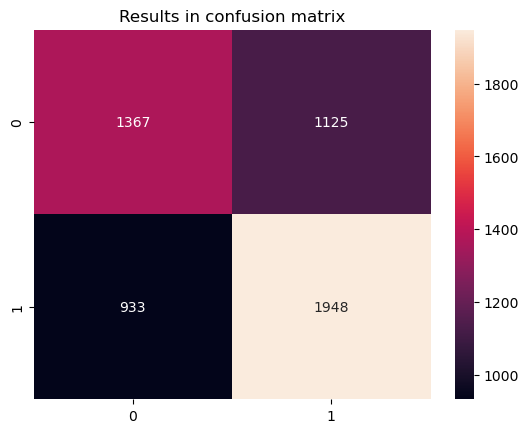

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

confMatrix = confusion_matrix(y_test, y_predf)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, y_predf))